<a href="https://colab.research.google.com/github/namnguyenpdx/SVMDualArtificialData/blob/main/ArtificialDual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     pcost       dcost       gap    pres   dres
 0: -1.4160e+01 -2.1988e+01  4e+02  2e+01  2e+00
 1: -7.0686e+00 -1.1396e+00  4e+01  2e+00  1e-01
 2: -1.7485e-01 -8.4940e-02  1e+00  5e-02  4e-03
 3: -9.3248e-03 -6.7682e-02  6e-02  1e-17  1e-14
 4: -2.6438e-02 -3.9742e-02  1e-02  3e-18  4e-15
 5: -3.0357e-02 -4.1359e-02  1e-02  3e-18  4e-15
 6: -3.8653e-02 -3.9333e-02  7e-04  4e-18  4e-15
 7: -3.9162e-02 -3.9174e-02  1e-05  4e-19  5e-15
 8: -3.9171e-02 -3.9171e-02  1e-07  4e-19  5e-15
 9: -3.9171e-02 -3.9171e-02  1e-09  1e-17  5e-15
Optimal solution found.


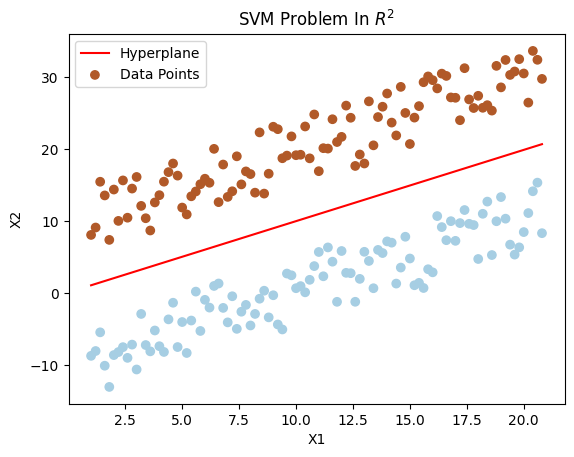

In [20]:
import numpy as np
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

# Load the dataset
Data = np.loadtxt('DataSetR2.txt')

# Separate features and target variable
X = Data[:, :-1]
y = Data[:, -1]

# Get the number of samples
m = X.shape[0]

# Add a column of ones to the features matrix
column1 = np.ones((m, 1))
X = np.hstack((X,column1))

Q=np.dot(X,X.T)

# Display the modified features matrix

# Initialize P matrix
P = np.zeros_like(Q)

# Compute P using nested loops
for i in range(m):
    for j in range(m):
        P[i, j] = y[i] * y[j] * Q[i, j]

# Define b as a vector of ones
b = np.ones(m)

# Convert P and b to cvxopt matrix format
P_cvxopt = matrix(P)
q_cvxopt = matrix(-b)

# Define G and h for the inequality constraints (lambda >= 0)
G = matrix(-np.eye(m))
h = matrix(np.zeros(m))

# Solve the quadratic programming problem
solution = solvers.qp(P_cvxopt, q_cvxopt, G, h)
lambda_solution = np.array(solution['x'])

# Display the solution
#print(lambda_solution)

# Initialize w as a zero vector with the same length as the number of columns in X
w = np.zeros(X.shape[1])

# Calculate w using the given formula
for i in range(len(y)):
    w += y[i] * lambda_solution[i] * X[i, :]

# Plot the hyperplane
x_plot = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)



b=w[2]
y_plot = (-w[0] * x_plot - b) / w[1]
plt.plot(x_plot, y_plot, '-r', label="Hyperplane")

 #Plot the points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, label="Data Points")

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("SVM Problem In $R^2$")
plt.legend()
plt.show()

